In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# Load dataset
columns = ['Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust', 'Language']
df=pd.read_csv('./desharnais.txt', names=columns, comment='%', na_values='?', skipinitialspace=True, delimiter=',')

df.head()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language
0,1,1.0,4.0,85,12,5152,253,52,305,34,302,1
1,2,0.0,0.0,86,4,5635,197,124,321,33,315,1
2,3,4.0,4.0,85,1,805,40,60,100,18,83,1
3,4,0.0,0.0,86,5,3829,200,119,319,30,303,1
4,5,0.0,0.0,86,4,2149,140,94,234,24,208,1


In [ ]:
# Missing values and data types
df.info()
df.isnull().sum()

In [ ]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
df.describe()

In [ ]:
# Duplicate rows
df.duplicated().sum()

In [ ]:
# Adequacy of data using heatmap
sns.heatmap(df.corr())

In [ ]:
# Checking for class imbalance
for col in columns[1:]:
    df[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# Plotting boxplots for each numerical column
for col in columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
from scipy.stats import trim_mean

trim_frac=0.10
for col in columns[1:]:
    print(f'Trimmed Mean for {col} : {trim_mean(df[col], proportiontocut=trim_frac)}')

In [ ]:
trim_frac = 0.1

trimmed_df = pd.DataFrame()

for col in df.columns:
    sorted_data = np.sort(df[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column = np.full_like(df[col], np.nan)
    trimmed_column[lower_idx:upper_idx] = trimmed_data
    
    trimmed_df[col] = trimmed_column

print(trimmed_df)


In [ ]:
trimmed_median_dict = {}
trimmed_std_dict = {}

for col in df.columns:
    sorted_data = np.sort(df[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_df = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_df = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

print("Trimmed Medians:")
print(trimmed_median_df[1:])

print("\nTrimmed Standard Deviations:")
print(trimmed_std_df[1:])


COCOMO81


In [3]:
import arff

with open('./cocomo811.arff') as f:
    dataset=arff.load(f)

cocomo = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

cocomo.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


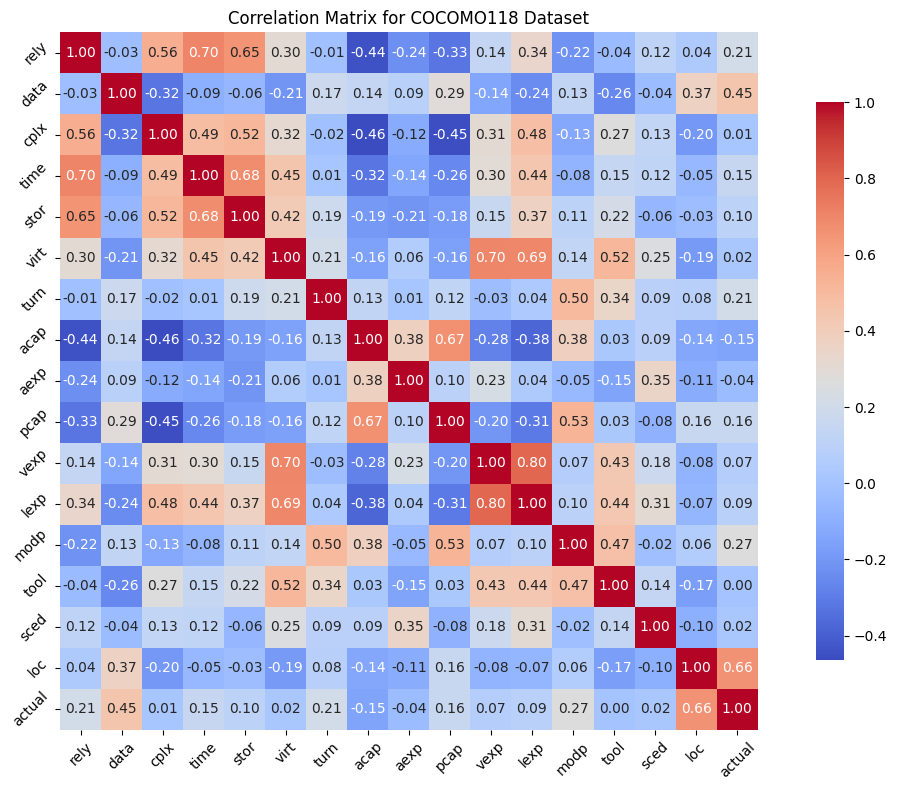

In [4]:
import seaborn as sns
correlation_matrix = cocomo.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for COCOMO118 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = cocomo.corr()

# Set a threshold for correlation
threshold = 0.8

# Create a set to hold features to drop
to_drop = set()

# Drop features with high correlation with each other (above threshold)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for correlation above the threshold
            colname = correlation_matrix.columns[i]  # Get the name of the column
            to_drop.add(colname)

# Also drop features with low correlation with the target variable 'Actual' (< 0.05)
low_correlation_threshold = 0.05
for col in correlation_matrix.columns:
    if col != 'actual':  # Skip the target variable itself
        if abs(correlation_matrix.loc[col, 'actual']) < low_correlation_threshold:
            to_drop.add(col)

# Remaining features after dropping correlated and low-correlation ones
selected_features = [col for col in cocomo.columns if col not in to_drop]

print("Features to keep:", selected_features)


Features to keep: ['rely', 'data', 'time', 'stor', 'turn', 'acap', 'pcap', 'vexp', 'lexp', 'modp', 'loc', 'actual']


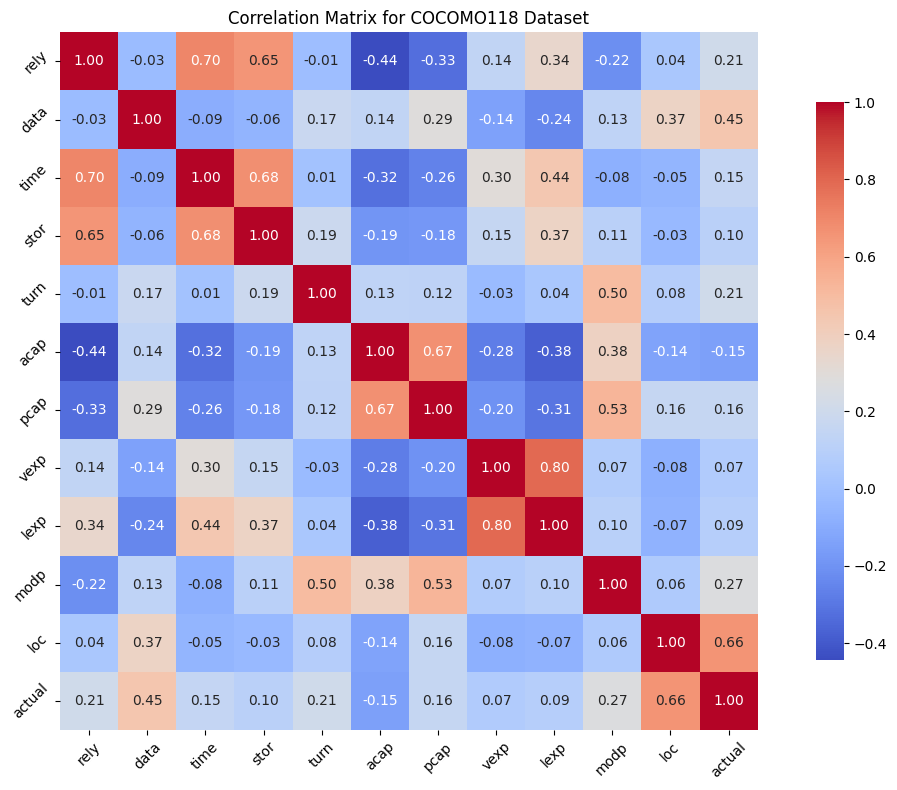

In [7]:
import seaborn as sns
cocomo=cocomo[selected_features]
correlation_matrix = cocomo.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for COCOMO118 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [6]:
# Separating features (X) and output (Y)
X_cocomo = cocomo.iloc[:, :-1]  # All columns except the last one (features)
Y_cocomo = cocomo.iloc[:, -1]    # Last column (output)

# Displaying the first few rows of the features and output
print("Features (X):")
print(X_cocomo.head())
print("\nOutput (Y):")
print(Y_cocomo.head())

Features (X):
   rely  data  cplx  time  stor  virt  turn  acap  aexp  pcap  vexp  lexp  \
0  0.88  1.16  0.70   1.0  1.06  1.15  1.07  1.19  1.13  1.17   1.1  1.00   
1  0.88  1.16  0.85   1.0  1.06  1.00  1.07  1.00  0.91  1.00   0.9  0.95   
2  1.00  1.16  0.85   1.0  1.00  0.87  0.94  0.86  0.82  0.86   0.9  0.95   
3  0.75  1.16  0.70   1.0  1.00  0.87  1.00  1.19  0.91  1.42   1.0  0.95   
4  0.88  0.94  1.00   1.0  1.00  0.87  1.00  1.00  1.00  0.86   0.9  0.95   

   modp  tool  sced    loc  
0  1.24  1.10  1.04  113.0  
1  1.10  1.00  1.00  293.0  
2  0.91  0.91  1.00  132.0  
3  1.24  1.00  1.04   60.0  
4  1.24  1.00  1.00   16.0  

Output (Y):
0    2040.0
1    1600.0
2     243.0
3     240.0
4      33.0
Name: actual, dtype: float64


In [8]:
# Function to detect outliers using IQR for the entire dataframe
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers for each column
        if not outliers.empty:
            outliers_dict[column] = outliers
    return outliers_dict

# Detecting outliers for all numeric columns
outliers_dict = detect_outliers_iqr(X_cocomo)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers[[column]])   # Display only the project and the outlier column
    print("\n")

Outliers in 'time':
    time
7   1.66
8   1.30
13  1.30
14  1.30
15  1.30
16  1.30
17  1.30
26  1.35
30  1.48
32  1.48
49  1.30
55  1.30
57  1.66


Outliers in 'stor':
    stor
7   1.56
9   1.56
10  1.56
13  1.56
15  1.56
16  1.56
30  1.56
32  1.56


Outliers in 'acap':
   acap
5  1.46


Outliers in 'aexp':
    aexp
23  1.29
28  1.29
29  1.29


Outliers in 'pcap':
    pcap
3   1.42
5   1.42
50  1.42


Outliers in 'lexp':
    lexp
7   1.14
14  1.14
61  1.14


Outliers in 'tool':
    tool
23  0.83


Outliers in 'sced':
    sced
13  1.23
14  1.23
21  1.23
22  1.23
28  1.23
29  1.23
33  1.23
56  1.23


Outliers in 'loc':
       loc
1    293.0
17   320.0
18  1150.0
19   299.0
20   252.0
31   390.0
47   464.0




In [9]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_cocomo)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


   Feature  Outlier Count
0     rely              0
1     data              0
2     cplx              0
3     time             13
4     stor              8
5     virt              0
6     turn              0
7     acap              1
8     aexp              3
9     pcap              3
10    vexp              0
11    lexp              3
12    modp              0
13    tool              1
14    sced              8
15     loc              7


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_cocomo
y = Y_cocomo

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_cocomo.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)          MAE           MSE         RMSE  \
0            50%           50%  1807.247203  5.094546e+06  2257.110207   
1            60%           40%   810.288326  3.949245e+06  1987.270864   
2            70%           30%  1205.346980  2.101140e+06  1449.530926   
3            80%           19%  1211.303663  2.281601e+06  1510.497039   
4            90%            9%  1487.329303  3.634565e+06  1906.453441   

   R-Squared  PRED(25)         MAPE  Explained Variance    Max Error  \
0  -2.864538  0.000000  5276.990784           -2.085457  5612.829119   
1   0.335368  0.000000   928.160361            0.378252  9081.189980   
2  -5.567878  5.263158  2631.886098           -5.479236  3180.237899   
3 -16.915904  0.000000  3163.557450          -15.967968  3590.423851   
4 -51.300754  0.000000  2121.290583          -21.433130  3526.796766   

     Median AE  Computation Time (s)  
0  1739.278860              0.008001  
1   270.994005              0.005080  
2   8

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_cocomo
y = Y_cocomo

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Support Vector Regression model
    model = SVR(kernel='linear')  # You can change the kernel to 'rbf' or others if needed

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_cocomo_svr.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)         MAE           MSE         RMSE  \
0            50%           50%  199.658097  1.675780e+05   409.362886   
1            60%           40%  670.130984  4.414426e+06  2101.053491   
2            70%           30%  198.148437  1.513426e+05   389.027787   
3            80%           19%  262.394048  3.307605e+05   575.117853   
4            90%            9%  278.251452  3.418759e+05   584.701541   

   R-Squared   PRED(25)        MAPE  Explained Variance    Max Error  \
0   0.872881  25.000000  106.956596            0.874547  1725.476003   
1   0.257081  23.076923  115.230741            0.305696  9565.629510   
2   0.526924  21.052632   97.940621            0.558184  1401.892801   
3  -1.597244  30.769231   90.231558           -1.199178  1530.542790   
4  -3.919535  14.285714  142.417701           -3.152575  1528.358586   

   Median AE  Computation Time (s)  
0  46.963866              0.010092  
1  44.384683              0.007003  
2  51.096518     

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_cocomo
y = Y_cocomo

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Gradient Boosting Regression model
    model = GradientBoostingRegressor()

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_cocomo_gbr.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)          MAE           MSE         RMSE  \
0            50%           50%   314.136328  6.151422e+05   784.310001   
1            60%           40%   782.216812  4.657377e+06  2158.095644   
2            70%           30%   293.883590  2.354764e+05   485.259112   
3            80%           19%  1157.789646  7.905367e+06  2811.648408   
4            90%            9%   735.051669  2.932960e+06  1712.588781   

   R-Squared   PRED(25)        MAPE  Explained Variance    Max Error  \
0   0.533376  18.750000  216.658748            0.546510  4013.974816   
1   0.216194  15.384615  263.261375            0.246885  9366.158420   
2   0.263933  15.789474  423.650599            0.303439  1709.696951   
3 -61.075610  15.384615  267.373579          -50.820580  7859.288053   
4 -41.204789   0.000000  201.242024          -34.705766  4516.149458   

    Median AE  Computation Time (s)  
0   97.194849              0.119048  
1  102.230566              0.121483  
2  130.3

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
X = X_cocomo
y = Y_cocomo

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],         # Shrinkage factor
    'max_depth': [3, 5, 7],                     # Maximum depth of each tree
    'min_samples_split': [10, 20],              # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],             # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0],                    # Fraction of samples to use for training
    'max_features': ['sqrt', 'log2']             # Number of features to consider for the best split
}

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Initialize GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='r2',  # You can change this to 'neg_mean_squared_error', etc.
                           cv=5,          # 5-fold cross-validation
                           verbose=1,     # Print progress
                           n_jobs=-1)     # Use all cores available

# Train-test splits to evaluate
splits = [0.5, 0.6, 0.7, 0.8, 0.9]
results_list = []

# Loop over each train-test split
for train_size in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    
    # Perform the grid search for each train-test split
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for train size {train_size * 100}%:", best_params)
    
    # Train the Gradient Boosting Regressor with the best hyperparameters
    best_model = grid_search.best_estimator_
    
    # Start the timer for computation time
    start_time = time.time()

    # Fit the model on the training set
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    median_ae = np.median(np.abs(y_test - y_pred))
    computation_time = time.time() - start_time

    # Store results for the current train-test split
    results = {
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    }

    # Append the results for each split to the results list
    results_list.append(results)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results_list)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_cocomo_gbr.xlsx', index=False)

# Display the results
print(results_df)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Python310\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best hyperparameters for train size 50.0%: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 60.0%: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 70.0%: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 80.0%: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.8}
Fitting 5 folds for each of 648 can

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming X_china_filtered and Y_china_filtered are your filtered datasets
X = X_cocomo
y = Y_cocomo

# Default parameters for RandomForestRegressor
# Default parameters used:
# n_estimators: 100
# max_depth: None (nodes are expanded until all leaves contain less than min_samples_split samples)
# min_samples_split: 2
# min_samples_leaf: 1
# bootstrap: True

# Initialize Random Forest Regressor model with default parameters
rf = RandomForestRegressor()

# Initialize an empty list to store results
results = []

# Loop for different train-test splits
for i, train_size in enumerate([0.5, 0.6, 0.7, 0.8, 0.9]):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model with default hyperparameters
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    median_ae = np.median(np.abs(y_test - y_pred))
    computation_time = time.time() - start_time

    # Store the results
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_rf_cocomo.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)         MAE           MSE         RMSE  \
0            50%           50%  631.907375  3.696530e+06  1922.636332   
1            60%           40%  733.015308  4.696925e+06  2167.239014   
2            70%           30%  609.576895  3.094807e+06  1759.206287   
3            80%           19%  258.360615  2.177720e+05   466.660525   
4            90%            9%  364.169714  3.991057e+05   631.748121   

   R-Squared   PRED(25)        MAPE  Explained Variance  Max Error  Median AE  \
0   0.251803  18.750000  159.644833            0.291424    9610.94   112.6715   
1   0.214574  15.384615  171.046557            0.275257    9764.70    89.3680   
2   0.515860   0.000000  181.916829            0.542190    7480.44   104.6700   
3   0.295290  15.384615  171.013638            0.325531    1405.45    77.9600   
4   0.171711  14.285714  349.494675            0.187598    1580.82   147.1900   

   Computation Time (s)  
0              0.210876  
1              0.15906

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
import time

# Assuming filtered_features and filtered_output are your datasets
X = X_cocomo
y = Y_cocomo

# Define base learners
base_learners = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Neural Net', MLPRegressor(max_iter=1000)),
    ('Elastic Net', ElasticNet()),
    ('XGBoost', xgb.XGBRegressor()),
    ('SVM', SVR())
]

# Initialize an empty list to store results
results = []

# Loop for different train-test splits
for train_size in [0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    
    # Create a new dataset for the meta-learner
    base_predictions_train = []
    base_predictions_test = []

    # Start the computation time measurement
    start_time = time.time()

    # Loop through each base learner
    for name, model in base_learners:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Store predictions for the meta-learner
        base_predictions_train.append(y_pred_train)
        base_predictions_test.append(y_pred_test)

    # Convert predictions to DataFrame for the meta-learner
    base_predictions_train = np.column_stack(base_predictions_train)
    base_predictions_test = np.column_stack(base_predictions_test)

    # Initialize a meta-learner (e.g., linear regression)
    meta_learner = LinearRegression()

    # Train the meta-learner
    meta_learner.fit(base_predictions_train, y_train)

    # Make final predictions
    final_predictions = meta_learner.predict(base_predictions_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, final_predictions)
    mse = mean_squared_error(y_test, final_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, final_predictions)
    pred_25 = np.mean(np.abs((y_test - final_predictions) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, final_predictions)
    max_error = np.max(np.abs(y_test - final_predictions))
    median_ae = np.median(np.abs(y_test - final_predictions))

    # End the computation time measurement
    computation_time = time.time() - start_time

    # Store the results
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_final_with_stacking_cocomo.xlsx', index=False)

# Display the results
print(results_df)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Train Size (%) Test Size (%)         MAE           MSE         RMSE  \
0            50%           50%  649.003125  3.897825e+06  1974.290970   
1            60%           40%  748.130769  4.477824e+06  2116.086896   
2            70%           30%  496.368421  1.462958e+06  1209.528029   
3            80%           19%  358.615385  4.164234e+05   645.308751   
4            90%            9%  498.000000  6.724646e+05   820.039372   

   R-Squared   PRED(25)        MAPE  Explained Variance  Max Error  Median AE  \
0   0.211060  12.500000  100.848253            0.260868     9800.0      80.00   
1   0.251212  15.384615  100.645999            0.315631     8945.0      67.85   
2   0.771140  10.526316  133.104732            0.791160     4800.0     131.00   
3  -0.347545   7.692308  182.949941           -0.316369     1934.0     136.00   
4  -0.395608   0.000000  301.226523           -0.387408     1914.0     193.00   

   Computation Time (s)  
0              0.537499  
1              0.39495

c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Missing values and data types
cocomo.info()
cocomo.isnull().sum()

In [ ]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
cocomo.describe()

In [ ]:
# Duplicate rows
cocomo.duplicated().sum()

In [ ]:
# Adequacy of data using heatmap
sns.heatmap(cocomo.corr())

In [ ]:
# Checking for class imbalance
for col in cocomo.columns:
    cocomo[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plotting boxplots for each numerical column
for col in cocomo.columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=cocomo[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
trim_frac=0.01
for col in cocomo.columns:
    print(f'Trimmed Mean for {col} : {trim_mean(cocomo[col], proportiontocut=trim_frac)}')

In [ ]:
trim_frac = 0.05

trimmed_cocomo = pd.DataFrame()

for col in cocomo.columns:
    sorted_data = np.sort(cocomo[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column_cocomo = np.full_like(cocomo[col], np.nan)
    trimmed_column_cocomo[lower_idx:upper_idx] = trimmed_data
    
    trimmed_cocomo[col] = trimmed_column_cocomo

trimmed_cocomo

In [ ]:
trim_cocomo_cleaned=trimmed_cocomo.dropna()

trim_cocomo_cleaned

In [ ]:

trimmed_median_dict = {}
trimmed_std_dict = {}

for col in trim_cocomo_cleaned.columns:
    sorted_data = np.sort(trim_cocomo_cleaned[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_cocomo = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_cocomo = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

trimmed_median_cocomo

In [ ]:
trimmed_std_cocomo

China

In [11]:
import arff

with open('./china.arff') as f:
    dataset=arff.load(f)

china = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

china.head()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,DevType,AdjFactor,Effort
0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,4,4.0,NewDev,1.056591,7490.0
1,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,2,17.0,Maint,1.040000,4150.0
2,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,1,9.0,NewDev,0.932515,668.0
3,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,1,4.0,Maint,1.115044,3238.0
4,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,1,13.0,Maint,0.951140,2994.0


In [10]:
# Missing values and data types
china.info()
china.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        499 non-null    float64
 1   Input      499 non-null    float64
 2   Output     499 non-null    float64
 3   Enquiry    499 non-null    float64
 4   File       499 non-null    float64
 5   Interface  499 non-null    float64
 6   Added      499 non-null    float64
 7   Changed    499 non-null    float64
 8   Deleted    499 non-null    float64
 9   Resource   499 non-null    object 
 10  Duration   499 non-null    float64
 11  DevType    499 non-null    object 
 12  AdjFactor  499 non-null    float64
 13  Effort     499 non-null    float64
dtypes: float64(12), object(2)
memory usage: 54.7+ KB


AFP          0
Input        0
Output       0
Enquiry      0
File         0
Interface    0
Added        0
Changed      0
Deleted      0
Resource     0
Duration     0
DevType      0
AdjFactor    0
Effort       0
dtype: int64

In [11]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
china.describe()

,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Duration,AdjFactor,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,8.719238,1.017885,3921.048096
std,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,7.347058,0.100899,6480.855600
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.648148,26.000000
25%,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.000000,0.960371,703.500000
50%,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,7.000000,1.013889,1829.000000
75%,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,11.000000,1.071083,3826.500000
max,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,84.000000,1.718923,54620.000000


In [12]:
# Duplicate rows
china.duplicated().sum()

np.int64(0)

In [ ]:
# # Adequacy of data using heatmap
# sns.heatmap(china.corr())

In [13]:
print(china.dtypes)
print(china.head())

#Encontured categorical data which is not in numeric form


AFP          float64
Input        float64
Output       float64
Enquiry      float64
File         float64
Interface    float64
Added        float64
Changed      float64
Deleted      float64
Resource      object
Duration     float64
DevType       object
AdjFactor    float64
Effort       float64
dtype: object
      AFP  Input  Output  Enquiry   File  Interface   Added  Changed  Deleted  \
0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0      0.0   
1   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0     61.0   
2   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0      0.0   
3   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0      4.0   
4   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0      0.0   

  Resource  Duration DevType  AdjFactor  Effort  
0        4       4.0  NewDev   1.056591  7490.0  
1        2      17.0   Maint   1.040000  4150.0  
2        1       9.0  NewDev   0.932515   668.0  
3    

In [12]:
#Converting categorical data into numerical data
print(china['DevType'].unique())


['NewDev' 'Maint']


In [13]:
china['devtype_numeric'], devtype_mapping = pd.factorize(china['DevType'])
print(devtype_mapping)


Index(['NewDev', 'Maint'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
china['devtype_numeric'] = le.fit_transform(china['DevType'])
print(le.classes_)


['Maint' 'NewDev']


In [15]:
china = china.drop(columns=['DevType'])


In [16]:
china.head()
#Successfully converted categorical data into numerical where 0='NewDev' & 1= 'Maint'


,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,Resource,Duration,AdjFactor,Effort,devtype_numeric
0,1587.0,774.0,260.0,340.0,128.0,0.0,1502.0,0.0,0.0,4,4.0,1.056591,7490.0,1
1,260.0,9.0,4.0,3.0,193.0,41.0,51.0,138.0,61.0,2,17.0,1.040000,4150.0,0
2,152.0,25.0,33.0,28.0,42.0,35.0,163.0,0.0,0.0,1,9.0,0.932515,668.0,1
3,252.0,151.0,28.0,8.0,39.0,0.0,69.0,153.0,4.0,1,4.0,1.115044,3238.0,0
4,292.0,93.0,0.0,194.0,20.0,0.0,0.0,307.0,0.0,1,13.0,0.951140,2994.0,0


In [ ]:
# Adequacy of data using heatmap
sns.heatmap(china.corr())

In [ ]:
# # Checking for class imbalance
# for col in china.columns:
#     china[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     # plt.show()

In [17]:
#Problem : Although Resource appears in numerical form it is of type object {1,2,3,4}, i.e. chnaging it to numeric

china[china.columns]=china[china.columns].apply(pd.to_numeric, errors='coerce')

In [18]:
print(china.head())

      AFP  Input  Output  Enquiry   File  Interface   Added  Changed  Deleted  \
0  1587.0  774.0   260.0    340.0  128.0        0.0  1502.0      0.0      0.0   
1   260.0    9.0     4.0      3.0  193.0       41.0    51.0    138.0     61.0   
2   152.0   25.0    33.0     28.0   42.0       35.0   163.0      0.0      0.0   
3   252.0  151.0    28.0      8.0   39.0        0.0    69.0    153.0      4.0   
4   292.0   93.0     0.0    194.0   20.0        0.0     0.0    307.0      0.0   

   Resource  Duration  AdjFactor  Effort  devtype_numeric  
0         4       4.0   1.056591  7490.0                1  
1         2      17.0   1.040000  4150.0                0  
2         1       9.0   0.932515   668.0                1  
3         1       4.0   1.115044  3238.0                0  
4         1      13.0   0.951140  2994.0                0  


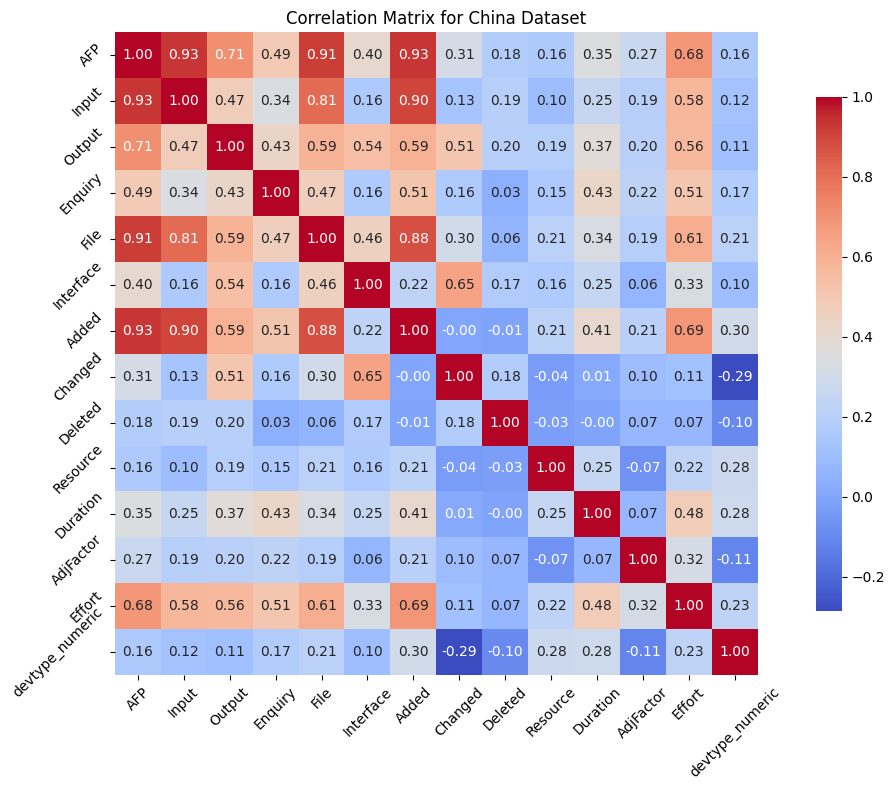

In [19]:
import seaborn as sns
correlation_matrix = china.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for China Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = china.corr()

# Set a threshold for correlation
threshold = 0.8

# Create a set to hold features to drop
to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Check for correlation above the threshold
            colname = correlation_matrix.columns[i]  # Get the name of the column
            to_drop.add(colname)

# Remaining features after dropping correlated ones
selected_features = [col for col in china.columns if col not in to_drop]

print("Features to keep:", selected_features)


Features to keep: ['AFP', 'Output', 'Enquiry', 'Interface', 'Changed', 'Deleted', 'Resource', 'Duration', 'AdjFactor', 'Effort', 'devtype_numeric']


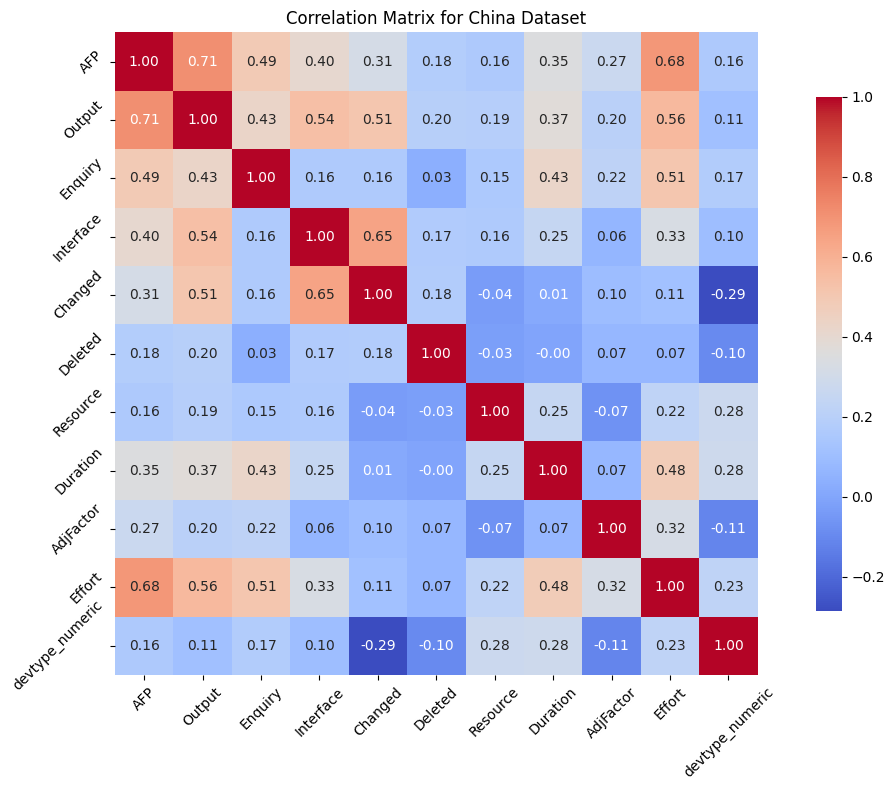

In [21]:
filtered_df_china=china[selected_features]

import seaborn as sns
correlation_matrix = filtered_df_china.corr()

# Step 2: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 3: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Matrix for China Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit into the figure area.
plt.show()

In [24]:
X_china = china.drop(columns=['Effort'])  # Features: all columns except 'Effort'
Y_china = china['Effort']

In [22]:
X_china_filtered = filtered_df_china.drop(columns=['Effort'])  # Features: all columns except 'Effort'
Y_china_filtered = filtered_df_china['Effort']

In [25]:
# Function to detect outliers using IQR for the entire dataframe
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Store outliers for each column
        if not outliers.empty:
            outliers_dict[column] = outliers
    return outliers_dict

# Detecting outliers for all numeric columns
outliers_dict = detect_outliers_iqr(X_china)

# Display outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers[column])  # Display only the project and the outlier column
    print("\n")

Outliers in 'AFP':
0      1587.0
21     3156.0
37     2190.0
45     2529.0
55     2145.0
        ...  
466    1108.0
475    1222.0
476    1093.0
478    2067.0
495    1106.0
Name: AFP, Length: 62, dtype: float64


Outliers in 'Input':
0       774.0
21     2075.0
37      706.0
45      554.0
55      862.0
71      356.0
75     1061.0
81      484.0
93      379.0
94      862.0
103    2019.0
105     346.0
108    2221.0
112     458.0
127     402.0
130     638.0
142     422.0
146    1098.0
154     716.0
160     920.0
169     625.0
178     711.0
184     353.0
215     345.0
229     460.0
237     932.0
244     349.0
249     541.0
259     452.0
268    1049.0
292     546.0
294     379.0
304    1240.0
317    1184.0
323     555.0
325     349.0
343     626.0
347     352.0
352     575.0
354     685.0
368     345.0
372     516.0
373     392.0
381     916.0
390     594.0
396     579.0
397     780.0
422     391.0
434    9404.0
436     534.0
438     535.0
446     433.0
451     804.0
456     401.0
461    132

In [26]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_china)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


            Feature  Outlier Count
0               AFP             62
1             Input             59
2            Output             54
3           Enquiry             50
4              File             56
5         Interface             60
6             Added             63
7           Changed             46
8           Deleted             64
9          Resource             31
10         Duration             21
11        AdjFactor              9
12  devtype_numeric              0


In [27]:
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(X_china_filtered)

# Creating a table from the outlier counts
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Displaying the table
print(outlier_counts_df)


           Feature  Outlier Count
0              AFP             62
1           Output             54
2          Enquiry             50
3        Interface             60
4          Changed             46
5          Deleted             64
6         Resource             31
7         Duration             21
8        AdjFactor              9
9  devtype_numeric              0


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_china_filtered
y = Y_china_filtered

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Linear Regression model
    model = LinearRegression()

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_china.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)          MAE           MSE         RMSE  \
0            50%           50%  2986.162837  3.361602e+07  5797.932321   
1            60%           40%  2318.322615  1.378325e+07  3712.579504   
2            70%           30%  2697.694231  2.568025e+07  5067.568856   
3            80%           19%  1941.443908  8.481260e+06  2912.260266   
4            90%            9%  3247.598125  3.692715e+07  6076.771364   

   R-Squared  PRED(25)        MAPE  Explained Variance     Max Error  \
0   0.276362      15.6  152.251602            0.276392  37767.933844   
1   0.557685      17.5  156.082073            0.558016  15884.131298   
2   0.540234      20.0  138.810786            0.544960  25539.884925   
3   0.673778      19.0  136.731025            0.674526  14849.314458   
4   0.332515      20.0  199.248167            0.338701  30985.055004   

     Median AE  Computation Time (s)  
0  1410.893134              0.007003  
1  1126.249121              0.005001  
2  10

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_china_filtered
y = Y_china_filtered

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Support Vector Regression model
    model = SVR(kernel='linear')  # You can change the kernel to 'rbf' or others if needed

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_china_svr.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)          MAE           MSE         RMSE  \
0            50%           50%  2517.103847  2.279681e+07  4774.600869   
1            60%           40%  2182.674083  1.723069e+07  4150.987168   
2            70%           30%  2758.734714  3.097259e+07  5565.301969   
3            80%           19%  2007.119545  1.366668e+07  3696.847975   
4            90%            9%  3048.038964  3.516514e+07  5930.020130   

   R-Squared   PRED(25)        MAPE  Explained Variance     Max Error  \
0   0.509263  18.800000   98.476255            0.526753  26634.302400   
1   0.447054  20.500000   89.323025            0.511055  19940.631490   
2   0.445482  20.666667  104.457049            0.486947  28926.528758   
3   0.474327  23.000000   98.730377            0.521864  18797.022732   
4   0.364364  12.000000  136.124837            0.383704  28036.983735   

     Median AE  Computation Time (s)  
0  1017.801364              0.142029  
1   892.518350              0.225019  

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
# Replace 'Effort' with the actual name of your output column if different
X = X_china_filtered
y = Y_china_filtered

# Number of splits to evaluate
num_splits = 5
results = []

# Loop for multiple train-test splits with varying train size
for i in range(num_splits):
    # Calculate the train size incrementally from 0.5 to 0.9
    train_size = 0.5 + (i * 0.1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=i)
    
    # Initialize the Gradient Boosting Regression model
    model = GradientBoostingRegressor()

    # Start the timer for computation time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate PRED(25)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate Explained Variance
    explained_variance = explained_variance_score(y_test, y_pred)

    # Calculate Maximum Error
    max_error = np.max(np.abs(y_test - y_pred))

    # Calculate Median Absolute Error
    median_ae = np.median(np.abs(y_test - y_pred))

    # Calculate computation time
    computation_time = time.time() - start_time

    # Store results for the current split
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",  # Format train size as percentage
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",  # Format test size as percentage
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_china_gbr.xlsx', index=False)

# Display the results
print(results_df)


  Train Size (%) Test Size (%)          MAE           MSE         RMSE  \
0            50%           50%  2889.329340  3.467887e+07  5888.876659   
1            60%           40%  2111.260158  1.194021e+07  3455.460849   
2            70%           30%  2846.004308  2.987047e+07  5465.388766   
3            80%           19%  2143.384337  1.172690e+07  3424.456450   
4            90%            9%  2964.960753  3.919756e+07  6260.795530   

   R-Squared   PRED(25)        MAPE  Explained Variance     Max Error  \
0   0.253483  19.600000  112.119483            0.254880  39286.341913   
1   0.616830  24.000000  157.116251            0.616831  16351.909639   
2   0.465214  25.333333  158.464443            0.465265  28762.538449   
3   0.548938  25.000000  158.800206            0.550367  12716.256576   
4   0.291475  32.000000  194.104073            0.291603  27727.338925   

     Median AE  Computation Time (s)  
0  1166.487851              0.180999  
1  1263.248185              0.216637  

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
import time

# Assuming filtered_desharnais is your DataFrame
X = X_china_filtered
y = Y_china_filtered

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],         # Shrinkage factor
    'max_depth': [3, 5, 7],                     # Maximum depth of each tree
    'min_samples_split': [10, 20],              # Minimum samples to split an internal node
    'min_samples_leaf': [1, 5, 10],             # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0],                    # Fraction of samples to use for training
    'max_features': ['sqrt', 'log2']             # Number of features to consider for the best split
}

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Initialize GridSearchCV to search for the best parameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='r2',  # You can change this to 'neg_mean_squared_error', etc.
                           cv=5,          # 5-fold cross-validation
                           verbose=1,     # Print progress
                           n_jobs=-1)     # Use all cores available

# Train-test splits to evaluate
splits = [0.5, 0.6, 0.7, 0.8, 0.9]
results_list = []

# Loop over each train-test split
for train_size in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    
    # Perform the grid search for each train-test split
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for train size {train_size * 100}%:", best_params)
    
    # Train the Gradient Boosting Regressor with the best hyperparameters
    best_model = grid_search.best_estimator_
    
    # Start the timer for computation time
    start_time = time.time()

    # Fit the model on the training set
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    pred_25 = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, y_pred)
    max_error = np.max(np.abs(y_test - y_pred))
    median_ae = np.median(np.abs(y_test - y_pred))
    computation_time = time.time() - start_time

    # Store results for the current train-test split
    results = {
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    }

    # Append the results for each split to the results list
    results_list.append(results)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results_list)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_china_gbr.xlsx', index=False)

# Display the results
print(results_df)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 50.0%: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300, 'subsample': 0.8}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 60.0%: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 70.0%: {'learning_rate': 0.01, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best hyperparameters for train size 80.0%: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_es

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, explained_variance_score)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
import time

# Assuming filtered_features and filtered_output are your datasets
X = X_china_filtered
y = Y_china_filtered

# Define base learners
base_learners = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Neural Net', MLPRegressor(max_iter=1000)),
    ('Elastic Net', ElasticNet()),
    ('XGBoost', xgb.XGBRegressor()),
    ('SVM', SVR())
]

# Initialize an empty list to store results
results = []

# Loop for different train-test splits
for train_size in [0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    
    # Create a new dataset for the meta-learner
    base_predictions_train = []
    base_predictions_test = []

    # Start the computation time measurement
    start_time = time.time()

    # Loop through each base learner
    for name, model in base_learners:
        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Store predictions for the meta-learner
        base_predictions_train.append(y_pred_train)
        base_predictions_test.append(y_pred_test)

    # Convert predictions to DataFrame for the meta-learner
    base_predictions_train = np.column_stack(base_predictions_train)
    base_predictions_test = np.column_stack(base_predictions_test)

    # Initialize a meta-learner (e.g., linear regression)
    meta_learner = LinearRegression()

    # Train the meta-learner
    meta_learner.fit(base_predictions_train, y_train)

    # Make final predictions
    final_predictions = meta_learner.predict(base_predictions_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, final_predictions)
    mse = mean_squared_error(y_test, final_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, final_predictions)
    pred_25 = np.mean(np.abs((y_test - final_predictions) / y_test) <= 0.25) * 100
    mape = np.mean(np.abs((y_test - final_predictions) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, final_predictions)
    max_error = np.max(np.abs(y_test - final_predictions))
    median_ae = np.median(np.abs(y_test - final_predictions))

    # End the computation time measurement
    computation_time = time.time() - start_time

    # Store the results
    results.append({
        'Train Size (%)': f"{int(train_size * 100)}%",
        'Test Size (%)': f"{int((1 - train_size) * 100)}%",
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-Squared': r2,
        'PRED(25)': pred_25,
        'MAPE': mape,
        'Explained Variance': explained_variance,
        'Max Error': max_error,
        'Median AE': median_ae,
        'Computation Time (s)': computation_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.to_excel('effort_estimation_results_final_with_stacking_china.xlsx', index=False)

# Display the results
print(results_df)


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Train Size (%) Test Size (%)       MAE           MSE         RMSE  \
0            50%           50%  3490.788  4.379583e+07  6617.841425   
1            60%           40%  3753.160  6.021416e+07  7759.778329   
2            70%           30%  2976.160  3.284682e+07  5731.214810   
3            80%           19%  3557.660  4.442312e+07  6665.067300   
4            90%            9%  2993.140  2.516547e+07  5016.519449   

   R-Squared   PRED(25)        MAPE  Explained Variance  Max Error  Median AE  \
0  -0.214538  14.000000  213.095334           -0.124700    37970.0     1498.5   
1  -1.092335  17.500000  187.746183           -0.955250    50354.0     1196.5   
2  -0.042998  17.333333  185.377780           -0.033565    32677.0     1172.0   
3  -0.477933  19.000000  236.770078           -0.385090    28020.0     1496.0   
4  -2.033026   8.000000  218.291392           -1.597231    18614.0     1573.5   

   Computation Time (s)  
0              0.741922  
1              1.047938  
2       

In [ ]:
# Checking for class imbalance
for col in china.columns:
    china[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plotting boxplots for each numerical column
for col in china.columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=china[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
trim_frac=0.1
for col in china.columns:
    print(f'Trimmed Mean for {col} : {trim_mean(china[col], proportiontocut=trim_frac)}')

In [ ]:
trimmed_china = pd.DataFrame()
trim_frac=0.01
for col in china.columns:
    sorted_data = np.sort(china[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column_china = np.full_like(china[col], np.nan)
    trimmed_column_china[lower_idx:upper_idx] = trimmed_data
    
    trimmed_china[col] = trimmed_column_china

trimmed_china

In [ ]:
trim_china_cleaned=trimmed_china.dropna()

trim_china_cleaned

In [ ]:
trimmed_median_dict = {}
trimmed_std_dict = {}

for col in trim_china_cleaned.columns:
    sorted_data = np.sort(trim_china_cleaned[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_china = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_china = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

trimmed_median_china

In [ ]:
trimmed_std_china

Kitchenham

In [ ]:
import arff

with open('./kitchenham.arff') as f:
    dataset=arff.load(f)

kitchenham = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

kitchenham.head()

In [ ]:
# Missing values and data types
kitchenham.info()
kitchenham.isnull().sum()

In [ ]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
kitchenham.describe()

In [ ]:
# Duplicate rows
kitchenham.duplicated().sum()

In [ ]:
# Adequacy of data using heatmap
sns.heatmap(kitchenham.corr())

In [ ]:
# Checking for class imbalance
for col in kitchenham.columns:
    kitchenham[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plotting boxplots for each numerical column
for col in kitchenham.columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=kitchenham[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
trim_frac=0.05
for col in kitchenham.columns:
    print(f'Trimmed Mean for {col} : {trim_mean(kitchenham[col], proportiontocut=trim_frac)}')

In [ ]:
trimmed_kitchenham = pd.DataFrame()

for col in kitchenham.columns:
    sorted_data = np.sort(kitchenham[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column_kitchenham = np.full_like(kitchenham[col], np.nan)
    trimmed_column_kitchenham[lower_idx:upper_idx] = trimmed_data
    
    trimmed_kitchenham[col] = trimmed_column_kitchenham

trimmed_kitchenham

In [ ]:
trim_kitchenham_cleaned=trimmed_kitchenham.dropna()

trim_kitchenham_cleaned

In [ ]:
trimmed_median_dict = {}
trimmed_std_dict = {}

for col in trim_kitchenham_cleaned.columns:
    sorted_data = np.sort(trim_kitchenham_cleaned[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_kitchenham = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_kitchenham = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

trimmed_median_kitchenham

In [ ]:
trimmed_std_kitchenham

In [181]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv('./desharnais.txt', names=columns, comment='%', skipinitialspace=True, delimiter=',')



In [ ]:

df.isna().sum()

print(df['TeamExp'].unique())
print(df['ManagerExp'].unique())

df['TeamExp'] = df['TeamExp'].replace('?', np.nan)
df['TeamExp'] = pd.to_numeric(df['TeamExp'], errors='coerce')

# Step 3: Replace NaN with the median (or mean if you prefer)
df['TeamExp'].fillna(df['TeamExp'].median(), inplace=True)
df['ManagerExp'] = df['ManagerExp'].replace('?', np.nan)
df['ManagerExp'] = pd.to_numeric(df['ManagerExp'], errors='coerce')

# Step 3: Replace NaN with the median (or mean if you prefer)
df['ManagerExp'].fillna(df['ManagerExp'].median(), inplace=True)



In [ ]:
print(df)

In [ ]:
# Replace NaN in 'TeamExp' with the median value
df['TeamExp'].fillna(df['TeamExp'].median(), inplace=True)

# Replace NaN in 'ManagerExp' with the median value
df['ManagerExp'].fillna(df['ManagerExp'].median(), inplace=True)


In [ ]:
print(df['TeamExp'].unique())
print(df['ManagerExp'].unique())

In [ ]:
X = df.drop(columns=['Effort'])  # 'Effort' is assumed to be the target variable
y = df['Effort']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


In [187]:
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming X is your feature set and y is your target variable
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive and calculate RMSE
rmse_scores = np.sqrt(-scores)

print(f'Cross-Validation RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data=pd.read_csv('./desharnais.txt', names=columns, comment='%', skipinitialspace=True, delimiter=',')

# Preprocessing: Replace '?' with NaN, and handle NaNs (for experience-related columns)
data.replace('?', np.nan, inplace=True)
data['TeamExp'] = pd.to_numeric(data['TeamExp'], errors='coerce').fillna(0)
data['ManagerExp'] = pd.to_numeric(data['ManagerExp'], errors='coerce').fillna(0)

# Features and target variable
X = data[['TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust', 'Language']]
y = data['Effort']

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data without cross-validation
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance without cross-validation
mse_before = mean_squared_error(y_test, y_pred)
mae_before = mean_absolute_error(y_test, y_pred)

# 10-Fold Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_cv_scores = np.sqrt(-cv_scores)

# Average RMSE from cross-validation
mean_rmse_cv = rmse_cv_scores.mean()
std_rmse_cv = rmse_cv_scores.std()

# Print results
print("Performance Without Cross-Validation:")
print(f"Mean Squared Error: {mse_before:.2f}")
print(f"Mean Absolute Error: {mae_before:.2f}")

print("\nPerformance With 10-Fold Cross-Validation:")
print(f"Mean RMSE: {mean_rmse_cv:.2f}")
print(f"Standard Deviation of RMSE: {std_rmse_cv:.2f}")

# Optional: Visualize the cross-validation results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), rmse_cv_scores, marker='o', linestyle='-', color='blue')
plt.title('RMSE for Each Fold in 10-Fold Cross-Validation')
plt.xlabel('Fold Number')
plt.ylabel('RMSE')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [ ]:
X = data[['TeamExp', 'ManagerExp', 'Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'Language']]
y = data['Effort']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R^2 for the initial model
r2_before = r2_score(y_test, y_pred)
accuracy_before = r2_before * 100  # Convert to percentage

# Print before K-fold R^2
print(f'R-squared before K-fold: {accuracy_before:.2f}%')

# Perform K-fold cross-validation
k_fold_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
accuracy_after = np.mean(k_fold_r2_scores) * 100  # Convert to percentage

# Print after K-fold R^2
print(f'Average R-squared after K-fold: {accuracy_after:.2f}%')

In [ ]:
from sklearn.svm import SVR
# Create and fit the SVR model
svr_model = SVR(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate R^2 for the initial model
r2_before = r2_score(y_test, y_pred)
accuracy_before = r2_before * 100  # Convert to percentage

# Print before K-fold R^2
print(f'R-squared before K-fold (SVR): {accuracy_before:.2f}%')

# Perform K-fold cross-validation
k_fold_r2_scores = cross_val_score(svr_model, X, y, cv=10, scoring='r2')
accuracy_after = np.mean(k_fold_r2_scores) * 100  # Convert to percentage

# Print after K-fold R^2
print(f'Average R-squared after K-fold (SVR): {accuracy_after:.2f}%')

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (SVR): {rmse:.2f}')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate R^2 for the initial model
r2_dt_before = r2_score(y_test, y_pred_dt)
accuracy_dt_before = r2_dt_before * 100  # Convert to percentage

# Print before K-fold R^2 for Decision Tree
print(f'R-squared before K-fold (Decision Tree): {accuracy_dt_before:.2f}%')

# Perform K-fold cross-validation for Decision Tree
k_fold_r2_dt_scores = cross_val_score(dt_model, X, y, cv=10, scoring='r2')
accuracy_dt_after = np.mean(k_fold_r2_dt_scores) * 100  # Convert to percentage

# Print after K-fold R^2 for Decision Tree
print(f'Average R-squared after K-fold (Decision Tree): {accuracy_dt_after:.2f}%')

# Calculate and print RMSE for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Root Mean Squared Error (Decision Tree): {rmse_dt:.2f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv') # Replace with your dataset loading method

# Define your features and target variable
X = df[['TeamExp', 'ManagerExp', 'Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'Language']]
y = df['Effort']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate R^2 for the initial model
r2_dt_before = r2_score(y_test, y_pred_dt)

# Print before K-fold R^2 for Decision Tree
print(f'R-squared before K-fold (Decision Tree): {r2_dt_before:.4f}')

# Perform K-fold cross-validation for Decision Tree
k_fold_r2_dt_scores = cross_val_score(dt_model, X, y, cv=10, scoring='r2')
average_r2_dt_after = np.mean(k_fold_r2_dt_scores)

# Print after K-fold R^2 for Decision Tree
print(f'Average R-squared after K-fold (Decision Tree): {average_r2_dt_after:.4f}')

# Calculate and print RMSE for Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Root Mean Squared Error (Decision Tree): {rmse_dt:.4f}')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data=pd.read_csv('./desharnais.txt', names=columns, comment='%', skipinitialspace=True, delimiter=',')

# Train-test split
X = data[['TeamExp', 'ManagerExp', 'Length', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'Language']]
y = data['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models, including Random Forest, Gradient Boosting, and KNN
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train models and evaluate performance
results = {}

for model_name, model in models.items():
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'Mean CV MSE': mean_cv_score,
        'RMSE': rmse,
        'R^2': r2
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean CV MSE: {metrics['Mean CV MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R^2: {metrics['R^2']:.2f}\n")
